## Importing python modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

## Feature Engineering

In [2]:
df=pd.read_csv('Invistico_Airline.csv')
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [3]:
#checking variety of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [16]:
# checking the null values in data
df.isnull().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [17]:
#filling the null values with the mean
df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mean(), inplace=True)

In [18]:
df.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.407410
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [19]:
# separating columns name which have numerical data
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols

['Age',
 'Flight Distance',
 'Seat comfort',
 'Departure/Arrival time convenient',
 'Food and drink',
 'Gate location',
 'Inflight wifi service',
 'Inflight entertainment',
 'Online support',
 'Ease of Online booking',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Cleanliness',
 'Online boarding',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes']

In [20]:
# separating columns which have categorical data
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols

['satisfaction', 'Gender', 'Customer Type', 'Type of Travel', 'Class']

## EDA

### Overall customer satisfaction details

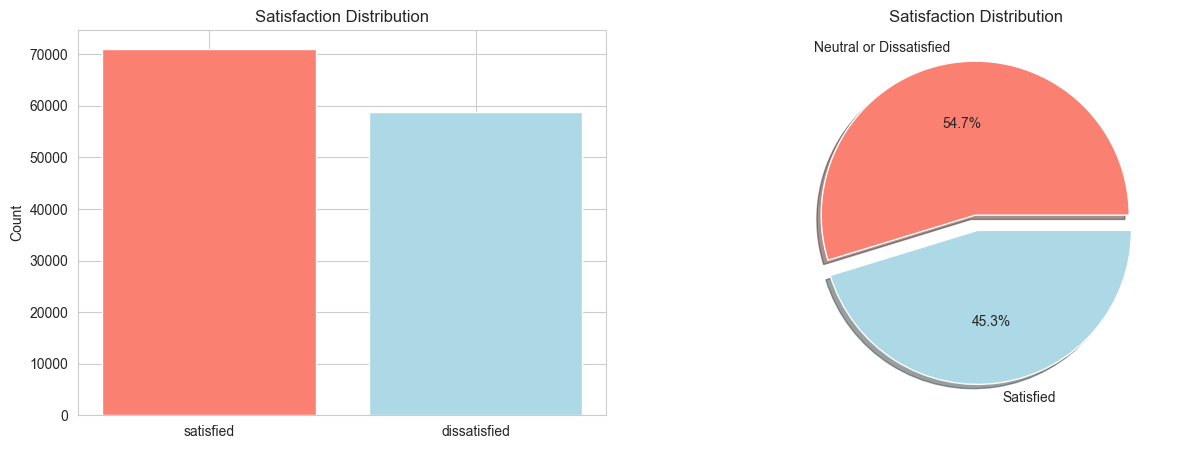

In [21]:
#Overall customer satisfaction rate
fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2, figsize=(15,5))

# Plot 1
ax1.bar(df["satisfaction"].value_counts().index, df["satisfaction"].value_counts(),color=["salmon", "lightblue"])
ax1.set(title="Satisfaction Distribution",ylabel="Count")

# Plot 2
ax2.pie(df["satisfaction"].value_counts(),colors=["salmon", "lightblue"],
        labels= ["Neutral or Dissatisfied", "Satisfied"] , 
        autopct='%1.1f%%',explode=[0.05,0.05] ,startangle=0, shadow = True)
ax2.set(title="Satisfaction Distribution");

### Customer satisfaction with respect to gender

In [22]:
df['Gender'].value_counts()

Gender
Female    65899
Male      63981
Name: count, dtype: int64

In [23]:
pd.crosstab(df['Gender'], df['satisfaction'], normalize=True)*100

satisfaction,dissatisfied,satisfied
Gender,,
Female,17.686326,33.052048
Male,27.580844,21.680782


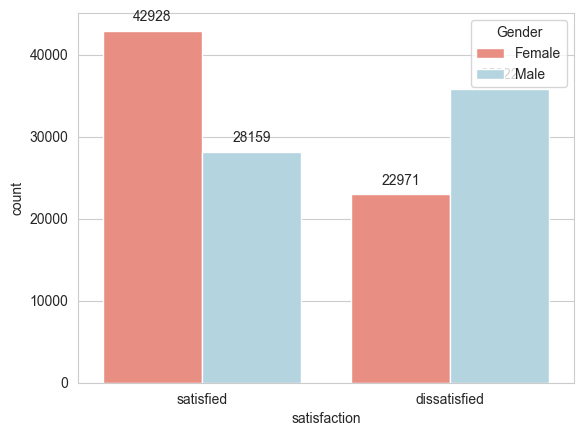

In [24]:
sns.set_style('whitegrid')
gen_no=sns.countplot(x='satisfaction',hue='Gender',data=df, palette=["salmon", "lightblue"])
for p in gen_no.patches:
    gen_no.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

### Customer satisfaction with respect to customer type

In [25]:
df['Customer Type'].value_counts()

Customer Type
Loyal Customer       106100
disloyal Customer     23780
Name: count, dtype: int64

In [26]:
pd.crosstab(df['Customer Type'], df['satisfaction'], normalize=True)*100

satisfaction,dissatisfied,satisfied
Customer Type,,
Loyal Customer,31.346628,50.344164
disloyal Customer,13.920542,4.388666


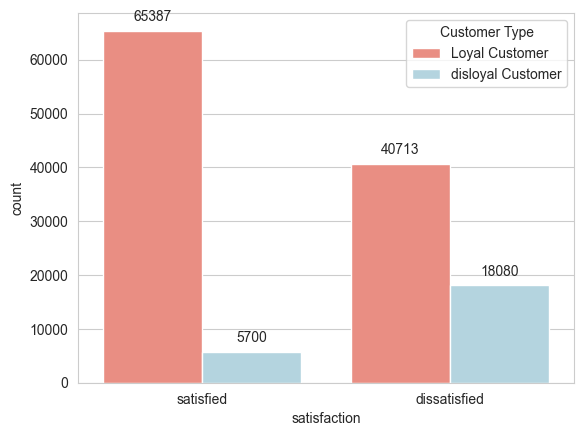

In [27]:
sns.set_style('whitegrid')
ct_no=sns.countplot(x='satisfaction',hue='Customer Type',data=df, palette=["salmon", "lightblue"])
for p in ct_no.patches:
    ct_no.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

### Customer Satisfaction with respect to Type of Travel

In [28]:
df['Type of Travel'].value_counts()

Type of Travel
Business travel    89693
Personal Travel    40187
Name: count, dtype: int64

In [29]:
pd.crosstab(df['Type of Travel'], df['satisfaction'], normalize=True)*100

satisfaction,dissatisfied,satisfied
Type of Travel,,
Business travel,28.747305,40.311056
Personal Travel,16.519864,14.421774


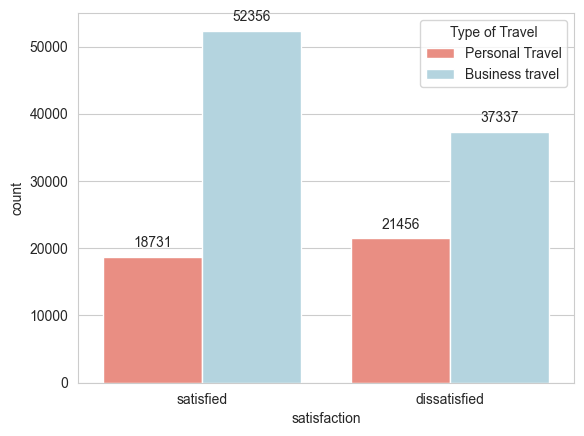

In [30]:
sns.set_style('whitegrid')
tot_no=sns.countplot(x='satisfaction',hue='Type of Travel',data=df, palette=["salmon", "lightblue"])
for p in tot_no.patches:
    tot_no.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

### Customer Satisfaction with respect to Class

In [31]:
df['Class'].value_counts()

Class
Business    62160
Eco         58309
Eco Plus     9411
Name: count, dtype: int64

In [32]:
pd.crosstab(df['Class'], df['satisfaction'], normalize=True)*100

satisfaction,dissatisfied,satisfied
Class,,
Business,13.908993,33.950570
Eco,27.206652,17.687866
Eco Plus,4.151524,3.094395


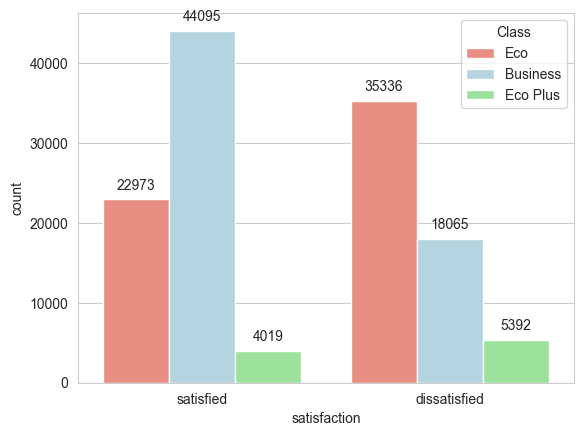

In [33]:
sns.set_style('whitegrid')
class_no=sns.countplot(x='satisfaction',hue='Class',data=df, palette=["salmon", "lightblue", "lightgreen"])
for p in class_no.patches:
    class_no.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

### Customer Satisfaction with respect to left customer input


In [34]:
customer_input_list = ['Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location', 'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding']
def plot_func(a,b):
    for category in customer_input_list[a:b]:
        plt.figure(figsize=(15,5))
        plt.subplot(1,2,1)
        axi1=sns.countplot(x=df[category],palette="Pastel1")
        for p in axi1.patches:
            axi1.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
        plt.subplot(1,2,2)
        axi2=sns.countplot(x=df[category],hue=df['satisfaction'], palette='Blues')
        for p in axi2.patches:
            axi2.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
        plt.show()

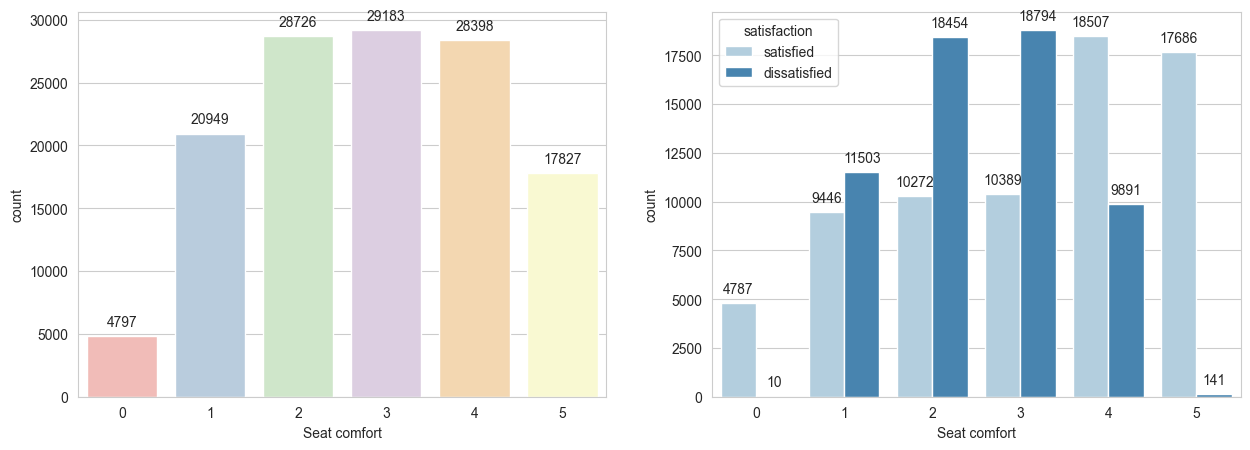

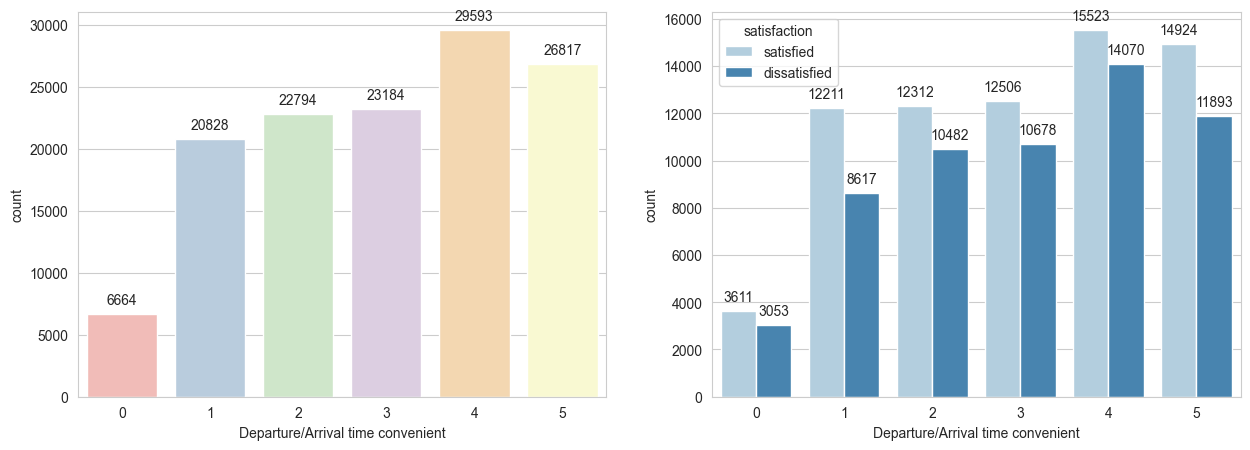

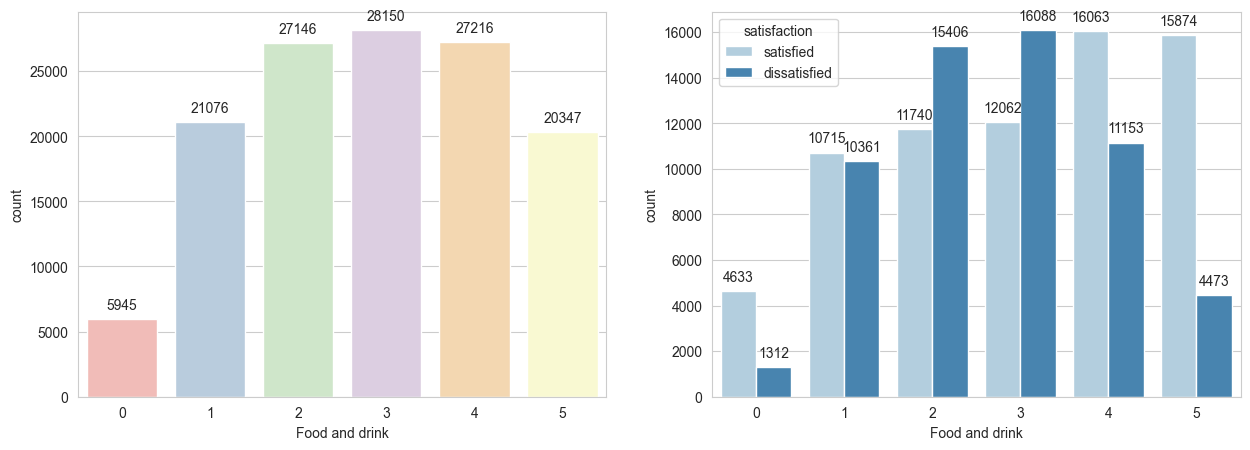

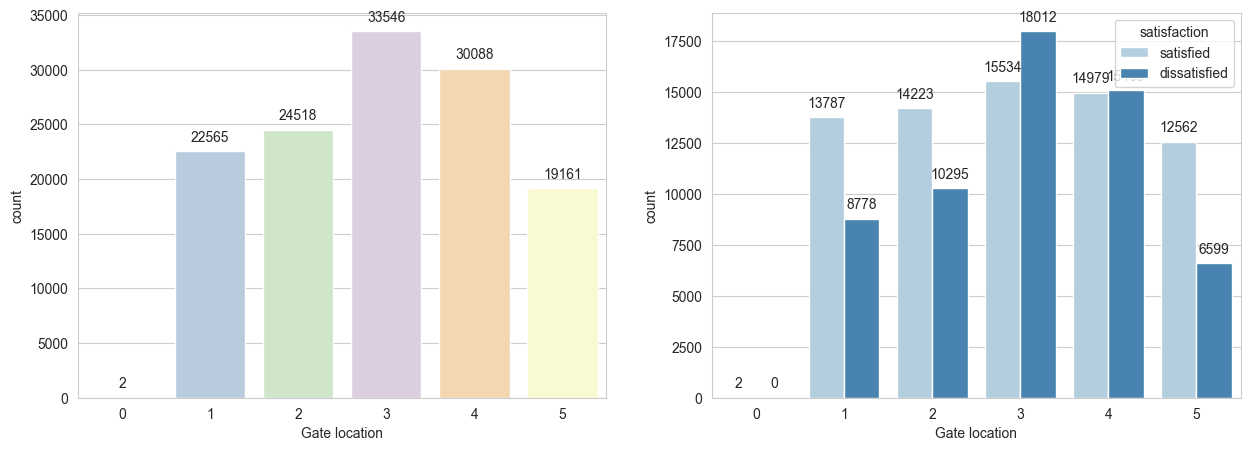

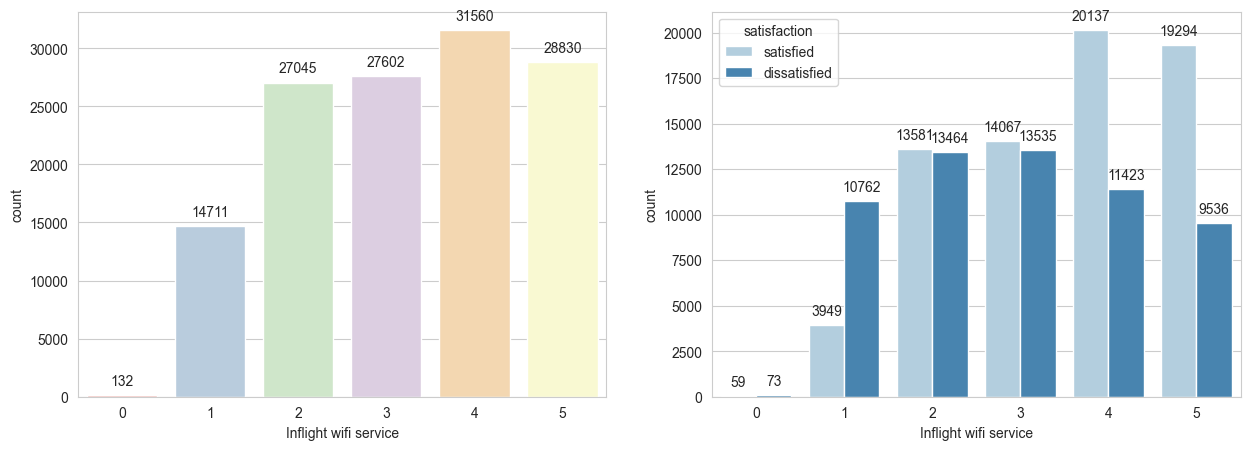

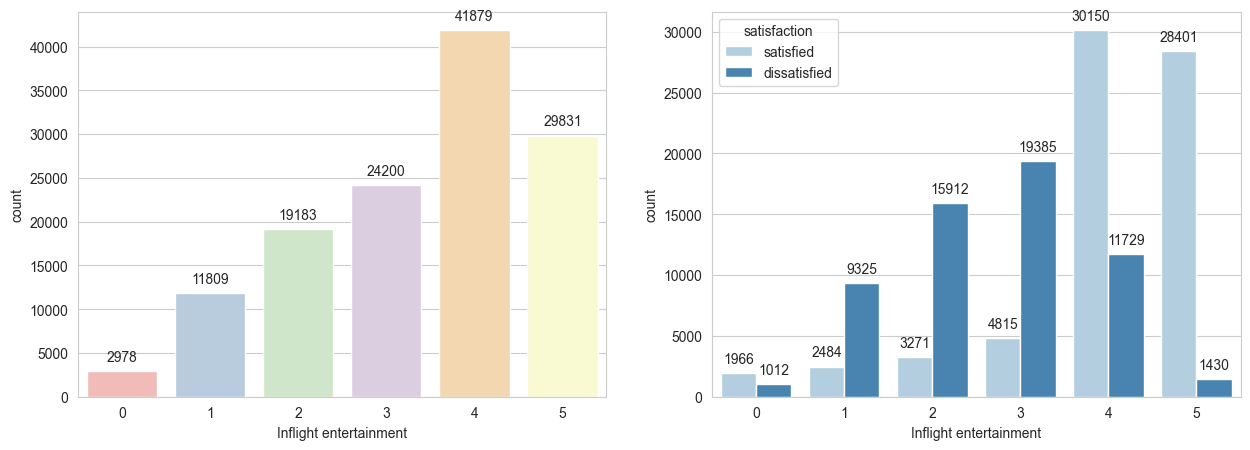

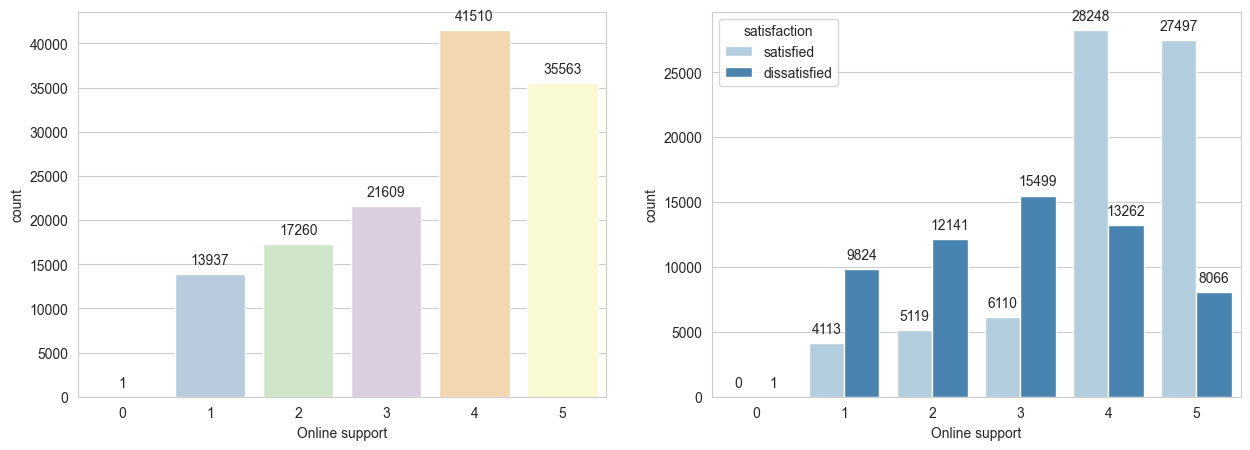

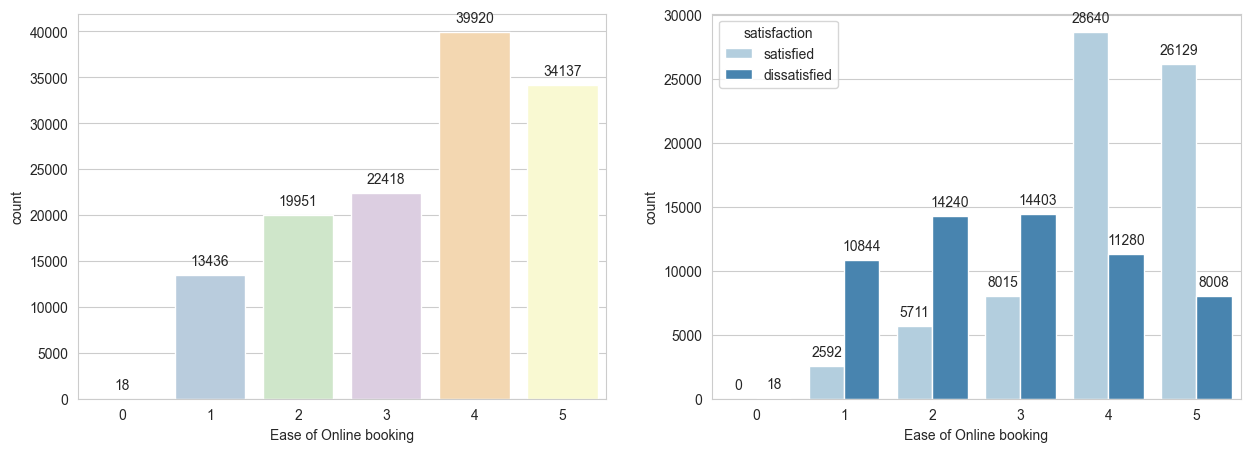

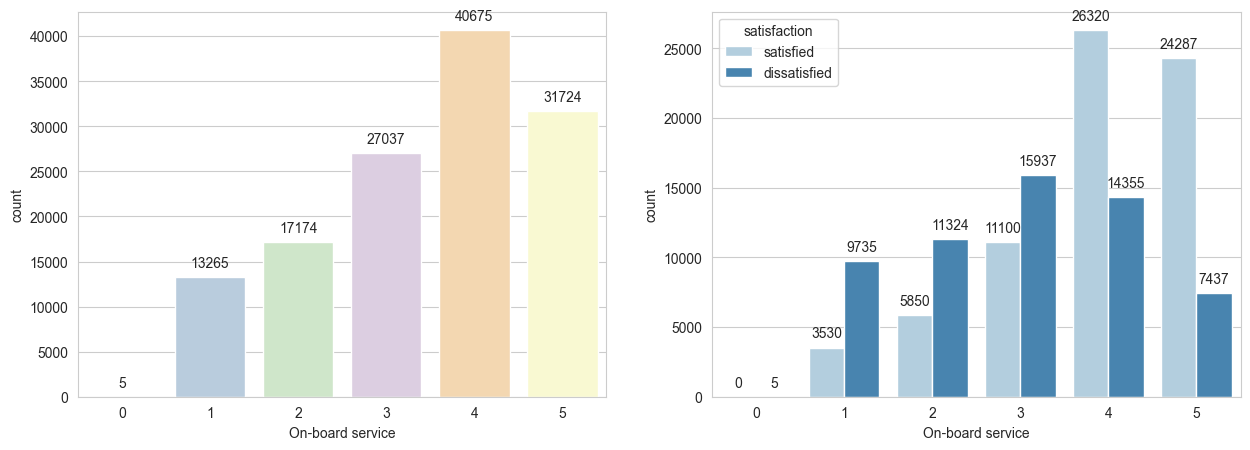

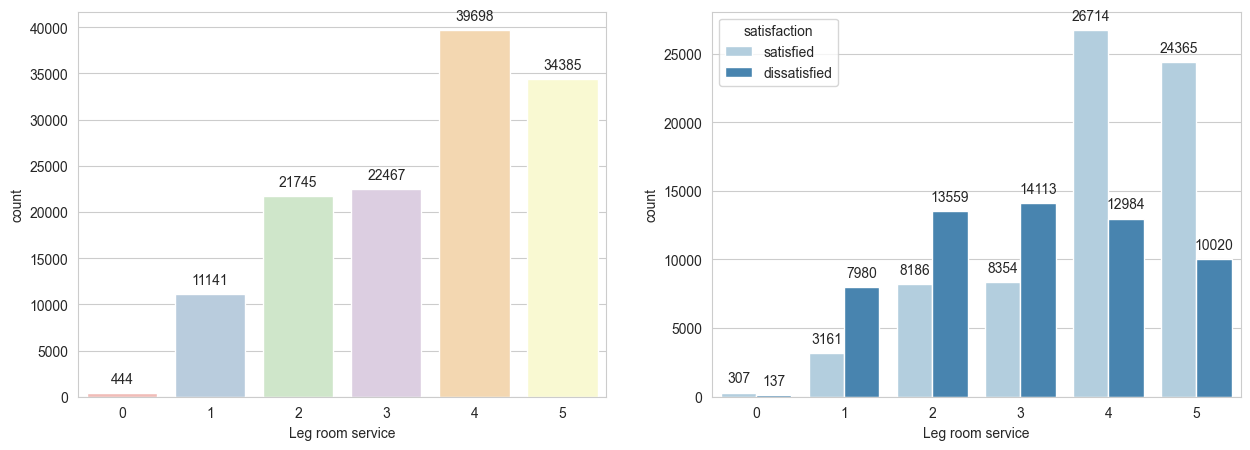

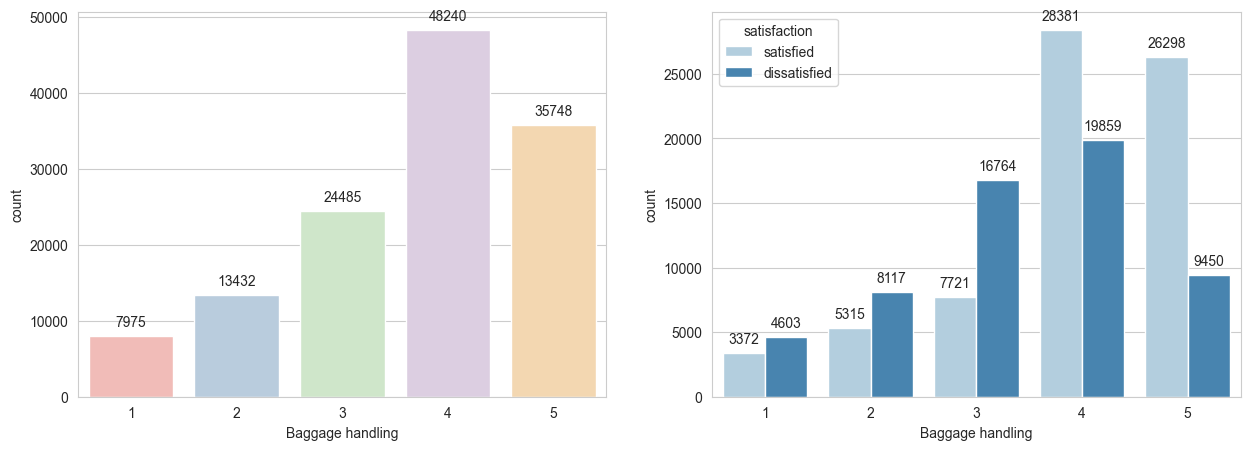

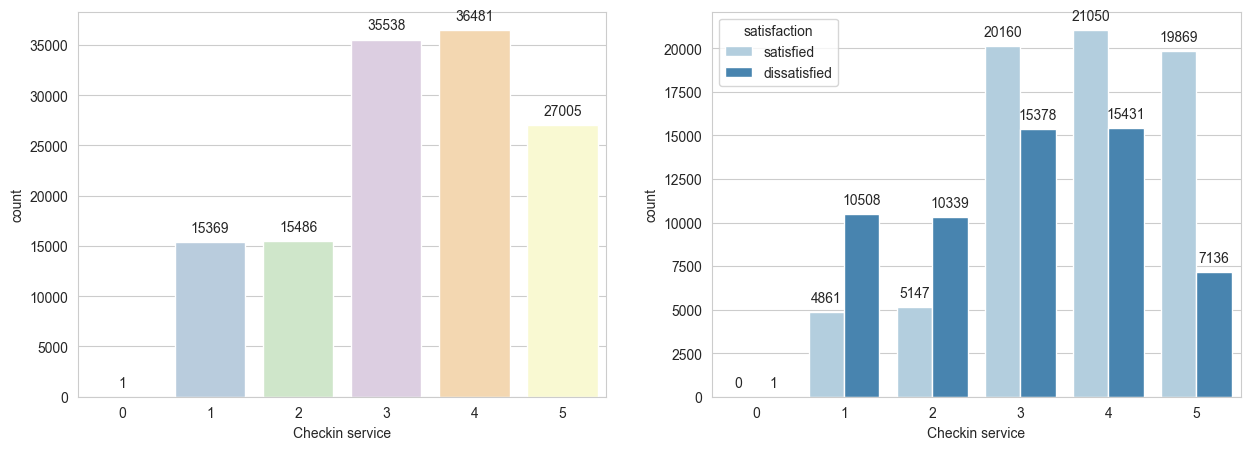

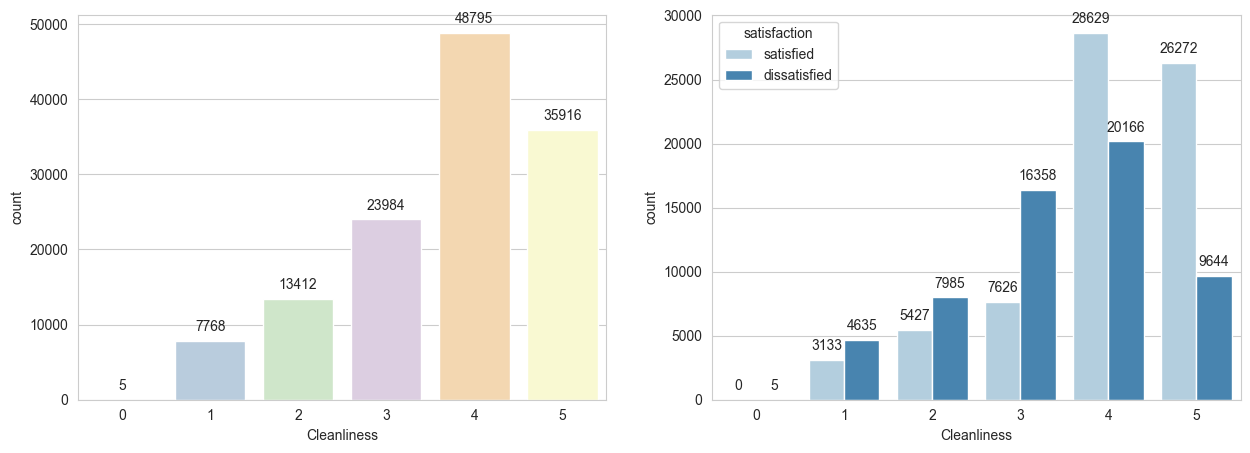

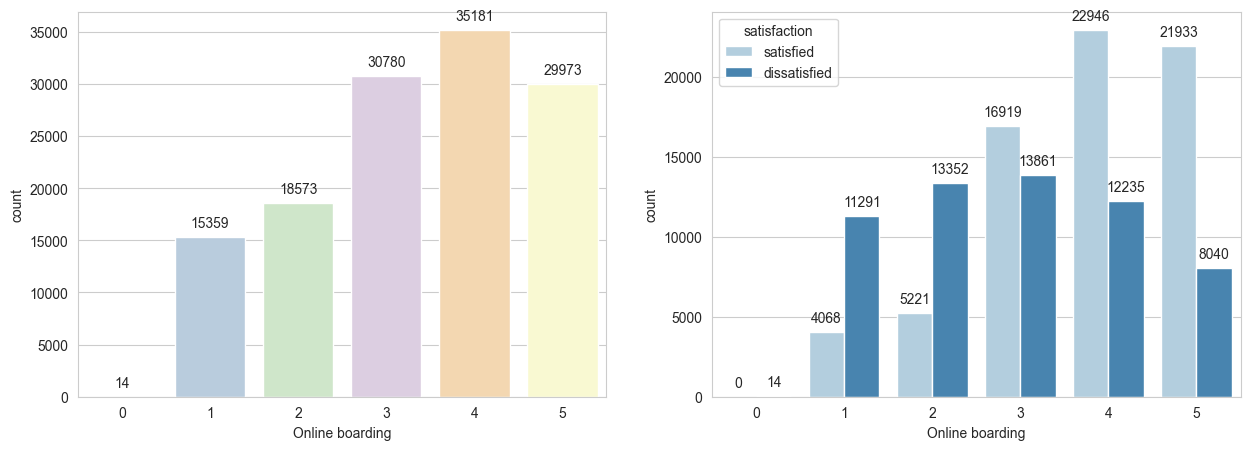

In [35]:
plot_func(0,14)

### Variation of age and flight distance

Text(0.5, 1.0, 'Distribution of Flight Distance')

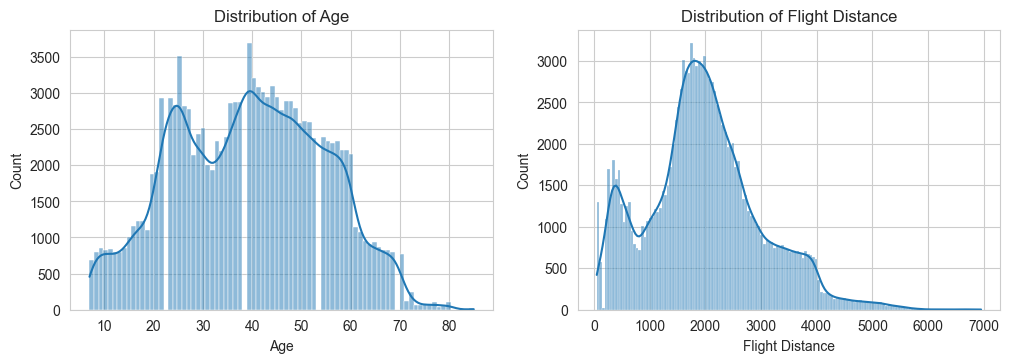

In [36]:
#plotting distribution of age
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.histplot(df['Age'], kde=True)
plt.title("Distribution of Age")

#plotting distribution of flight distance
plt.subplot(2, 2, 2)
sns.histplot(df['Flight Distance'], kde=True)
plt.title("Distribution of Flight Distance")

## Preparing data for model implementation

In [37]:
# Combine Departure Delay and Arrival Delay to create a new feature 'Total Delay'
df['Total Delay'] = df['Departure Delay in Minutes'] + df['Arrival Delay in Minutes']

# Calculate the mean of all Inflight Service features to create a new feature 'Inflight Service Score'
inflight_features = ['Seat comfort', 'Inflight wifi service', 'Inflight entertainment', 'Online support','Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling','Checkin service', 'Cleanliness', 'Online boarding']
df['Inflight Service Score'] = df[inflight_features].mean(axis=1)

# Calculate the interaction between 'Flight Distance' and 'On-board service'
df['Interaction_Flight_Onboard'] = df['Flight Distance'] * df['On-board service']

# Create dummy variables for 'Class' feature
df = pd.get_dummies(df, columns=['Class'], drop_first=True)

# Drop the original 'Departure Delay in Minutes' and 'Arrival Delay in Minutes' columns
df.drop(columns=['Departure Delay in Minutes', 'Arrival Delay in Minutes','Flight Distance'], inplace=True)

In [38]:
# Convert categorical variables to numerical using Label Encoding
label_encoder = LabelEncoder()
cat_cols = ['Gender', 'Customer Type', 'Type of Travel', 'satisfaction']
for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Split the data into features (X) and target (y)
X = df.drop(columns=['satisfaction'])
y = df['satisfaction']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Models implementation

### Random Forest

In [39]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
rf_y_pred = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print("Random Forest Classifier Accuracy:", rf_accuracy)
print("Random Forest Classifier Classification Report:")
print(classification_report(y_test, rf_y_pred))
print("Random Forest Classifier Confusion Matrix:")
print(confusion_matrix(y_test, rf_y_pred))

Random Forest Classifier Accuracy: 0.9577302125038497
Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     11675
           1       0.97      0.95      0.96     14301

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976

Random Forest Classifier Confusion Matrix:
[[11235   440]
 [  658 13643]]


### Logistic Regression

In [40]:
lr_classifier = LogisticRegression(max_iter=2000, random_state=42)
lr_classifier.fit(X_train, y_train)
lr_y_pred = lr_classifier.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_y_pred)
print("Logistic Regression Accuracy:", lr_accuracy)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, lr_y_pred))
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, lr_y_pred))

Logistic Regression Accuracy: 0.8292654758238374
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81     11675
           1       0.84      0.86      0.85     14301

    accuracy                           0.83     25976
   macro avg       0.83      0.83      0.83     25976
weighted avg       0.83      0.83      0.83     25976

Logistic Regression Confusion Matrix:
[[ 9297  2378]
 [ 2057 12244]]


### Decision Tree

In [41]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
dt_y_pred = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_y_pred)
print("Decision Tree Classifier Accuracy:", dt_accuracy)
print("Decision Tree Classifier Classification Report:")
print(classification_report(y_test, dt_y_pred))
print("Decision Tree Classifier Confusion Matrix:")
print(confusion_matrix(y_test, dt_y_pred))

Decision Tree Classifier Accuracy: 0.9371342777948876
Decision Tree Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     11675
           1       0.94      0.94      0.94     14301

    accuracy                           0.94     25976
   macro avg       0.94      0.94      0.94     25976
weighted avg       0.94      0.94      0.94     25976

Decision Tree Classifier Confusion Matrix:
[[10832   843]
 [  790 13511]]


### Gradient Boost

In [42]:
# Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train, y_train)
gb_y_pred = gb_classifier.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_y_pred)

print("Gradient Boosting Classifier Accuracy:", gb_accuracy)
print("Gradient Boosting Classifier Classification Report:")
print(classification_report(y_test, gb_y_pred))
print("Gradient Boosting Classifier Confusion Matrix:")
print(confusion_matrix(y_test, gb_y_pred))

Gradient Boosting Classifier Accuracy: 0.925392670157068
Gradient Boosting Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92     11675
           1       0.93      0.93      0.93     14301

    accuracy                           0.93     25976
   macro avg       0.92      0.92      0.92     25976
weighted avg       0.93      0.93      0.93     25976

Gradient Boosting Classifier Confusion Matrix:
[[10685   990]
 [  948 13353]]


### All Models Accuracy Comparison

In [43]:
print('Random Forest: {:.2f}'.format(rf_accuracy*100))
print('Logistic Regression: {:.2f}'.format(lr_accuracy*100))
print('Decision Tree: {:.2f}'.format(dt_accuracy*100))
print('Gradient Boosting: {:.2f}'.format(gb_accuracy*100))

Random Forest: 95.77
Logistic Regression: 82.93
Decision Tree: 93.71
Gradient Boosting: 92.54


## Plotting model accuracy

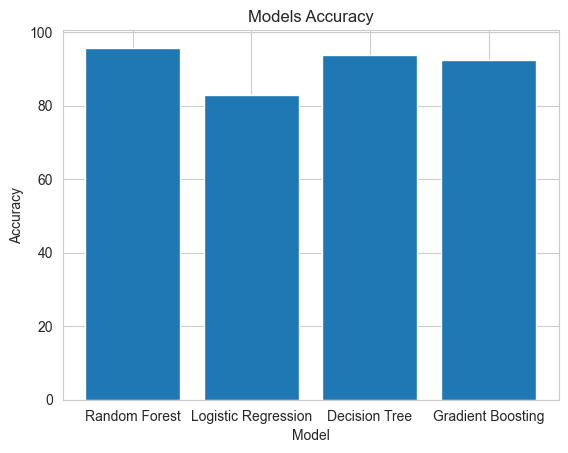

In [44]:
categories = ['Random Forest', 'Logistic Regression', 'Decision Tree', 'Gradient Boosting']
values = [rf_accuracy*100, lr_accuracy*100, dt_accuracy*100, gb_accuracy*100]
plt.bar(categories, values)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Models Accuracy')
plt.show()